### Goal

https://github.com/rposhala/Recommender-System-on-MovieLens-dataset?tab=readme-ov-file

The goal of this notebook is to build a simple recommendation model

### Data Import

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv('dataset/ml-100k/u.data', delim_whitespace=True, names=["user id","item id","rating","timestamp"])

/var/folders/5w/0rbr_3m55zvcks3pv8gm43s40000gn/T/ipykernel_5393/283411475.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('dataset/ml-100k/u.data', delim_whitespace=True, names=["user id","item id","rating","timestamp"])


In [13]:
df = df.drop(['timestamp'], axis=1)

In [14]:
df.head()

,user id,item id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [15]:
df.shape

(100000, 3)

### EDA

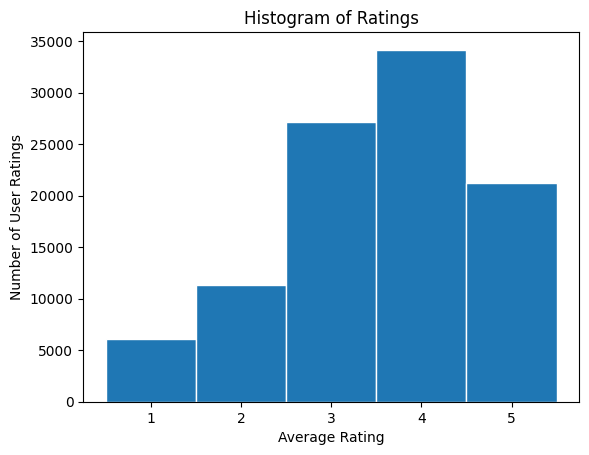

In [57]:
plt.hist(x=df['rating'], bins=range(1,7), align='left', edgecolor='white')
plt.xlabel('Average Rating')
plt.ylabel('Number of User Ratings')
plt.title('Histogram of Ratings')
plt.show()